In [117]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
names=['id','id_str','screen_name','location','description','url','followers_count','friends_count','listedcount','created_at','favourites_count','verified','statuses_count','lang','status','default_profile','default_profile_image','has_extended_profile','name','bot']
df = pd.read_csv('/Users/ashishbansal/Downloads/merged.csv',encoding="ISO-8859-1",
                    header=None,delim_whitespace=False,names=names,na_values='?',)

#deleting the unnecessary fields
del df['id']
del df['screen_name']
del df ['id_str']
del df['location']
del df['url']
del df['name']

df.verified=df.verified.astype(int)
df.default_profile=df.default_profile.astype(int)
df.default_profile_image=df.default_profile_image.astype(int)

X_train, X_test, y_train, y_test = train_test_split(df.ix[:,0:13], df['bot'], test_size=0.2, random_state=0)

#tf for training data
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train['description'].values.astype('U'))
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)

#tf for test data
X_test_counts = count_vect.transform(X_test['description'].values.astype('U'))
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_test_counts)
X_test_tf = tf_transformer.transform(X_test_counts)

#classifer training
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tf, y_train)
#prediction for test data
predicted = clf.predict(X_test_tf)

import numpy as np
np.mean(predicted == y_test)

0.75391498881431762

In [125]:
from sklearn.metrics import *
print("Accuracy Score:", (accuracy_score(y_test,predicted )))
print("Precision Score: ", (precision_score(y_test,predicted,average='micro' )))
print("Recall Score: ", (recall_score(y_test,predicted,average='micro' )))
print("F1 Score: ", (f1_score(y_test,predicted,average='micro' )))
#print("AUC Score: ", (roc_auc_score(y_test,predicted,average=None )))

Accuracy Score: 0.753914988814
Precision Score:  0.753914988814
Recall Score:  0.753914988814
F1 Score:  0.753914988814


In [119]:
from sklearn import metrics
from sklearn.metrics import *
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted,pos_label=1)
metrics.auc(fpr, tpr)

0.75413396860986548

In [120]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

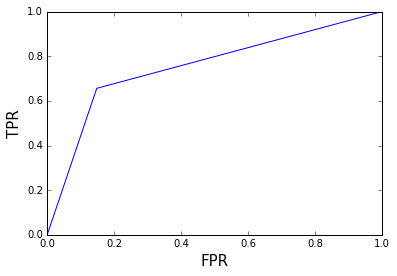

In [121]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted,pos_label=1)
metrics.auc(fpr,tpr)
#x = np.array(fpr)
#y = np.array(tpr)
plt.xlabel('FPR',fontsize=15)
plt.ylabel('TPR',fontsize=15)
plt.plot(fpr,tpr)

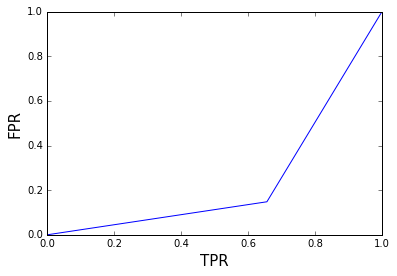

In [122]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted,pos_label=1)
metrics.auc(fpr,tpr)
plt.ylabel('FPR',fontsize=15)
plt.xlabel('TPR',fontsize=15)
plt.plot(tpr,fpr)